<a href="https://colab.research.google.com/github/prissyyy/Studi-Independen/blob/main/Latihan-21_Time-Series-Forecast-in-Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Rabu, 6 Okt 2021

**Time series forecasting With Python**

Apa yang dimaksud dengan time series analysis?
Metode time series adalah metode peramalan dengan menggunakan analisa pola hubungan antara variabel yang akan dipekirakan dengan variabel waktu. Peramalan suatu data time series perlu memperhatikan tipe atau pola data. ... Sedangkan pola siklis merupakan fluktuasi dari data untuk waktu yang lebih dari satu tahun.

Forecasting adalah istilah yang kerap muncul dalam kegiatan berbisnis baik dalam rencana bisnis baru maupun pebisnis yang sudah menjalankan bisnisnya. Forecasting atau peramalan memegang peran penting sukses-tidaknya sebuah usaha atau bisnis dijalankan

Time series forecasting adalah sebuah area pada machine learning yang berfokus pada atribut waktu. Sesuai namanya, bidang ini berfokus pada analisis rentetan data yang sekuensial terhadap waktu, lalu memprediksi data-data yang akan datang berdasarkan data sebelumnya

**SUMBER DATA**

[Referensi](https://www.kaggle.com/freespirit08/time-series-for-beginners-with-arima)


**MENYIAPKAN DATASET**

In [ ]:
!wget -O AirPassengers.csv https://raw.githubusercontent.com/prissyyy/Studi-Independen/main/Data_Set/AirPassengers.csv

--2021-10-07 05:54:26--  https://raw.githubusercontent.com/prissyyy/Studi-Independen/main/Data_Set/AirPassengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1746 (1.7K) [text/plain]
Saving to: ‘AirPassengers.csv’

AirPassengers.csv   100%[===================>]   1.71K  --.-KB/s    in 0s      

2021-10-07 05:54:26 (21.1 MB/s) - ‘AirPassengers.csv’ saved [1746/1746]



**IMPORT LIBRARY YANG DIBUTUHKAN**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

**Read Data**

berhubungan dengan 2 kolom, satu adalah temporal yaitu: bulan dalam hal ini & lainnya adalah nilai yang akan diramalkan yaitu: penumpang pesawat. Untuk membuat plot grafik lebih mudah, kami menyetel indeks kerangka data panda ke Bulan. Selama plot, indeks akan bertindak secara default sebagai sumbu x & karena hanya memiliki 1 kolom lagi, yang akan secara otomatis diambil sebagai sumbu y


In [ ]:
dataset = pd.read_csv("https://raw.githubusercontent.com/prissyyy/Studi-Independen/main/Data_Set/AirPassengers.csv")
# Parse strings to datetime type
dataset['Month']=pd.to_datetime(dataset['Month'], infer_datetime_format=True)
indexedDataset=dataset.set_index(['Month'])

Dari plot di bawah ini, kita dapat melihat bahwa ada komponen Trend di seri th. Oleh karena itu, kami sekarang memeriksa stasioneritas data

In [ ]:
from datetime import datetime
indexedDataset.head(5)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


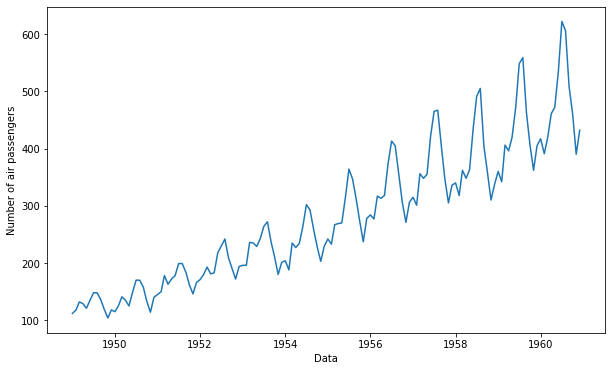

In [ ]:
## plot graph

plt.xlabel("Data")
plt.ylabel("Number of air passengers")
plt.plot(indexedDataset)

In [ ]:
#Determing rolling statistics
rolmean = indexedDataset.rolling(window=12).mean()

rolstd = indexedDataset.rolling(window=12).std()
print(rolmean, rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


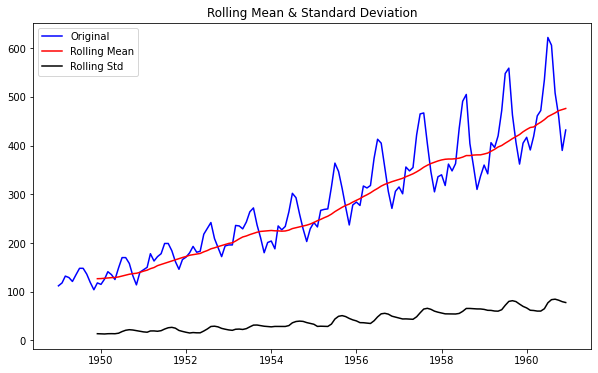

In [ ]:
#Plot rolling statistics:
orig = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Dari grafik di atas, kita melihat bahwa rolling mean itu sendiri memiliki komponen tren meskipun standar deviasi rolling cukup konstan dengan waktu. Agar deret waktu kita stasioner, kita perlu memastikan bahwa kedua statistik bergulir yaitu: mean & std. pengembang tetap waktu invarian atau konstan dengan waktu. Jadi kurva untuk keduanya harus sejajar dengan sumbu x, yang dalam kasus kami tidak demikian.

Untuk lebih meningkatkan hipotesis kami bahwa deret waktu tidak stasioner, mari kita lakukan uji ADCF.

In [ ]:
#Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

print ('Results of Dickey-Fuller Test:')
dftest = adfuller(indexedDataset['#Passengers'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
  dfoutput['Critical Value (%s)' %key] = value
  
print(dfoutput)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Agar deret Waktu stasioner, pengujian ADCF-nya harus memiliki:

1. nilai p menjadi rendah (menurut hipotesis nol)

2. Nilai kritis pada interval kepercayaan 1%,5%,10% harus sedekat mungkin dengan Statistik Uji

Dari hasil pengujian ADCF di atas, terlihat bahwa p-value (maksimal bisa 1,0) sangat besar. Juga nilai-nilai kritis tidak ada yang dekat dengan Statistik Uji. Oleh karena itu, kita dapat dengan aman mengatakan bahwa Time Series kita saat ini tidak stasioner

Transformasi Data untuk mencapai Stasioneritas
Ada beberapa cara untuk mencapai stasioneritas melalui transformasi data seperti mengambil log10 , loge , kuadrat, akar kuadrat, kubus, akar pangkat tiga, peluruhan eksponensial, pergeseran waktu dan sebagainya ...

Di buku catatan kita, mari kita mulai dengan transformasi log. Tujuan kami adalah untuk menghapus komponen tren. Oleh karena itu, kurva yang lebih datar (yaitu: sejajar dengan sumbu x) untuk deret waktu dan rata-rata bergulir setelah mengambil log akan mengatakan bahwa transformasi data kami melakukan pekerjaan dengan baik.

**Log Scale Transformation**

In [ ]:
#Estimating trend
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

In [ ]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red')

Dari grafik di atas, terlihat bahwa meskipun rata-rata bergulir tidak stasioner, tetapi masih lebih baik dari kasus sebelumnya, di mana tidak ada transformasi yang diterapkan ke seri. Jadi kita setidaknya bisa mengatakan bahwa kita sedang menuju ke arah yang benar.

Kita tahu dari grafik di atas bahwa baik Time series dengan skala log maupun rata-rata bergeraknya memiliki komponen tren. Dengan demikian kita dapat menerapkan intuisi dasar: pengurangan satu dari yang lain harus menghilangkan komponen tren dari keduanya. Itu seperti:

Note **logscaleL=stationarypart(L1)+trend(LT)**
movingavgoflogscaleA=stationarypart(A1)+trend(AT)
resultseriesR=L−A=(L1+LT)−(A1+AT)=(L1−A1)+(LT−AT)
Since, L & A are series & it moving avg, their trend will be more or less same, Hence
LT-AT nearly equals to 0

Thus trend component will be almost removed. And we have,

R=L1−A1, our final non-trend curve

In [ ]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

# Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
  #Determing rolling statistics
  movingAverage = timeseries.rolling(window=12).mean()
  movingSTD = timeseries.rolling(window=12).std()
  
  #Plot rolling statistics:
  orig = plt.plot(timeseries, color='blue',label='Original')
  mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
  std = plt.plot(movingSTD, color='black', label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)
  
  #Perform Dickey-Fuller test:
  print('Result of Dickey-Fuller Test:')
  dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lag Used','Number of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
  print(dfoutput)

In [ ]:
test_stationarity(datasetLogScaleMinusMovingAverage)

Dari grafik di atas, kami mengamati bahwa intuisi kami bahwa "mengurangi dua deret terkait yang memiliki komponen tren yang sama akan membuat hasil stasioner" adalah benar. Kami menemukan bahwa:

p-value telah berkurang dari 0,99 menjadi 0,022.
Nilai kritis pada interval kepercayaan 1%,5%,10% cukup dekat dengan Statistik Uji. Jadi, dari 2 poin di atas, kita dapat mengatakan bahwa deret yang diberikan adalah stasioner.
Namun, dengan semangat untuk mendapatkan akurasi yang lebih tinggi, mari kita jelajahi & coba temukan skala yang lebih baik dari log kita saat ini.

Mari kita coba peluruhan eksponensial.
Untuk info lebih lanjut, lihat jawaban saya 12 di bagian atas buku catatan di atasnya.

Exponential Decay Transformation (Transformasi Peluruhan Eksponensial)

In [ ]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

Dari grafik di atas, tampaknya peluruhan eksponensial tidak memiliki keunggulan dibandingkan skala log karena kedua kurva yang sesuai serupa. Namun, dalam statistik, kesimpulan tidak dapat ditarik hanya dengan melihat kurva. Oleh karena itu, kami melakukan uji ADCF lagi pada deret peluruhan di bawah ini.

In [ ]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale -  exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

Kami mengamati bahwa Deret Waktu adalah stasioner & juga deret untuk bergerak rata-rata & std. pengembang hampir sejajar dengan sumbu x sehingga mereka juga tidak memiliki tren.
Juga,

1. nilai p mengalami penurunan dari 0,022 menjadi 0,005.

2. Nilai Statistik Uji sangat dekat dengan nilai Kritis.
Kedua poin tersebut mengatakan bahwa transformasi kita saat ini lebih baik daripada transformasi logaritma sebelumnya. Meskipun, kami tidak dapat mengamati perbedaan apa pun dengan melihat grafik secara visual, pengujian memastikan peluruhan jauh lebih baik.

Tetapi mari kita coba sekali lagi & temukan apakah ada solusi yang lebih baik. Kami akan mencoba teknik time shift sederhana, yaitu:

Diberikan satu set pengamatan pada deret waktu:
x0,x1,x2,x3,....xn
Nilai yang digeser akan menjadi:
null,x0,x1,x2,....xn <---- pada dasarnya semua xi digeser 1 pos ke kanan

Dengan demikian, deret waktu dengan nilai pergeseran waktu adalah:
nol,(x1−x0),(x2−x1),(x3−x2),(x4−x3),....(xn−xn−1)

Time Shift Transformation ¶ (Transformasi Pergeseran Waktu)

In [ ]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

Dari 2 grafik di atas, kita dapat melihat bahwa, secara visual ini adalah hasil terbaik sebagai seri kami bersama dengan nilai statistik rolling moving avg & moving std. pengembang sangat datar & stasioner. Tapi, tes ADCF menunjukkan kepada kita bahwa:

1. p-value 0,07 tidak sebaik 0,005 peluruhan eksponensial.

2. Uji Nilai Statistik tidak sedekat dengan nilai kritis seperti untuk peluruhan eksponensial.

Dengan demikian kami telah mencoba 3 transformasi berbeda: log, peluruhan exp & pergeseran waktu. Untuk kesederhanaan, kita akan menggunakan skala log. Alasan untuk melakukan ini adalah agar kita dapat kembali ke skala semula selama peramalan.

Mari kita uraikan 3 komponen dari rangkaian skala log menggunakan fungsi pustaka sistem. Sekali, kami memisahkan komponen kami, kami dapat dengan mudah mengabaikan tren & musim dan memeriksa sifat bagian sisa.

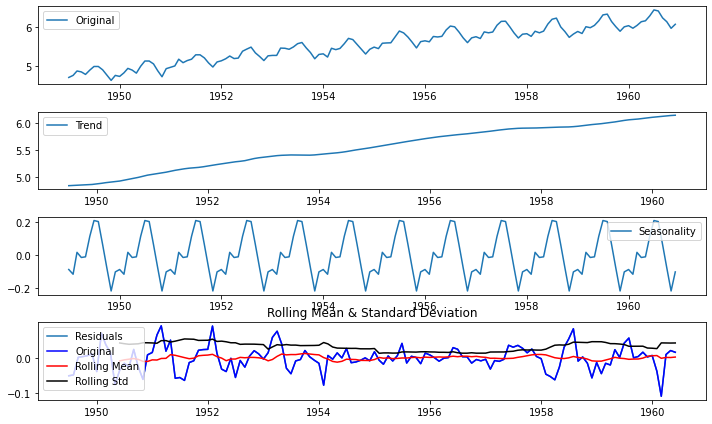

Result of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lag Used                      9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

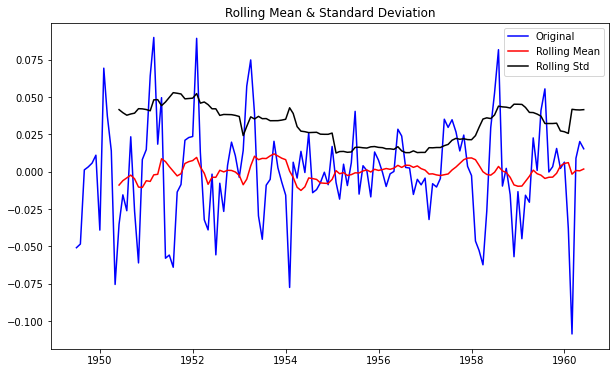

Result of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lag Used                      9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

Plotting ACF & PACF ¶


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


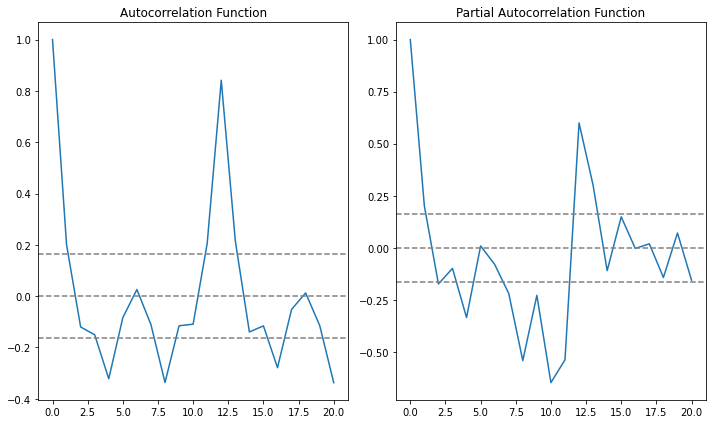

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


Dari grafik ACF, kita melihat bahwa kurva menyentuh garis y=0.0 pada x=2. Jadi, dari teori, Q = 2 Dari grafik PACF, kita melihat bahwa kurva menyentuh garis y=0.0 pada x=2. Jadi, dari teori, P = 2

ARIMA adalah AR + I + MA. Sebelum kita melihat model ARIMA, mari kita periksa hasil dari model AR & MA individu. Perhatikan bahwa, model ini akan memberikan nilai RSS. Nilai RSS yang lebih rendah menunjukkan model yang lebih baik.

Building Models ¶


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


Plotting AR model


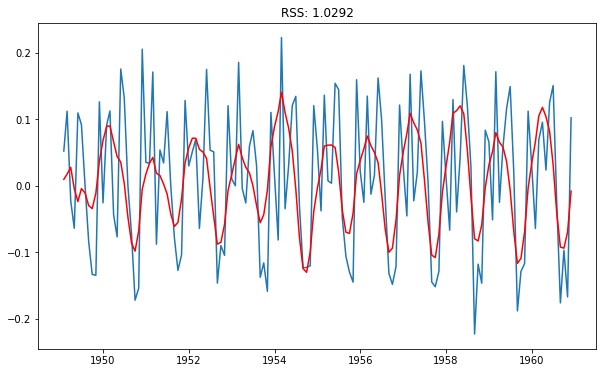

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR model')

In [ ]:
 from statsmodels.tsa.arima_model import ARIMA

#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))
print('Plotting AR model')

In [ ]:
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting["#Passengers"])**2))

Dengan menggabungkan AR & MA ke dalam ARIMA, kami melihat bahwa nilai RSS telah menurun dari kedua kasus menjadi 1,0292, menunjukkan ARIMA lebih baik daripada model komponen individualnya.

Dengan model ARIMA yang dibangun, sekarang kita akan menghasilkan prediksi. Namun, sebelum kita melakukan plot untuk prediksi, kita perlu mengubah kembali prediksi tersebut ke bentuk aslinya. Ini karena, model kami dibangun di atas data yang ditransformasikan log.

Prediction & Reverse transformations ¶


In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

In [ ]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

In [ ]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['#Passengers'].iloc[0], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

In [ ]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

Kami melihat bahwa perkiraan perkiraan kami sangat dekat dengan nilai deret waktu nyata yang menunjukkan model yang cukup akurat.

In [ ]:
indexedDataset_logScale

In [ ]:
results_ARIMA.plot_predict(1,264)
x=results_ARIMA.forecast(steps=120)

In [ ]:
x[1]

In [ ]:
len(x[1])

In [ ]:
np.exp(x[1])

In [ ]:
print(x[1])

In [ ]:
print(len(x[1]))

In [ ]:
print(np.exp(x[1]))

The End¶